In [1]:
#libraries
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt  

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.shape
test.shape

(5681, 11)

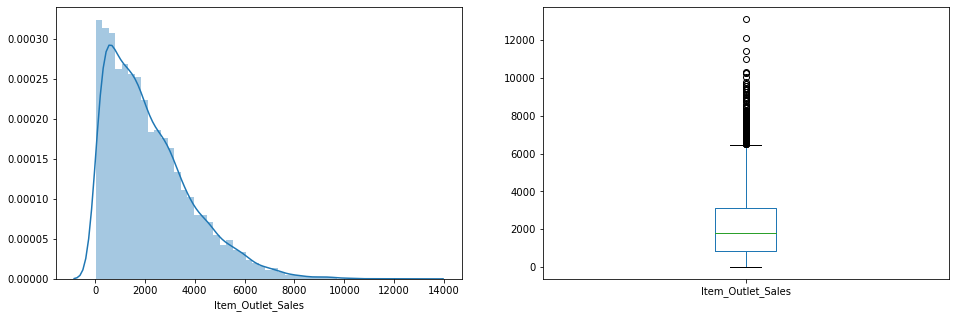

In [7]:
#visualisation
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales'])

plt.subplot(122)
train['Item_Outlet_Sales'].plot.box(figsize=(16,5))

plt.show()

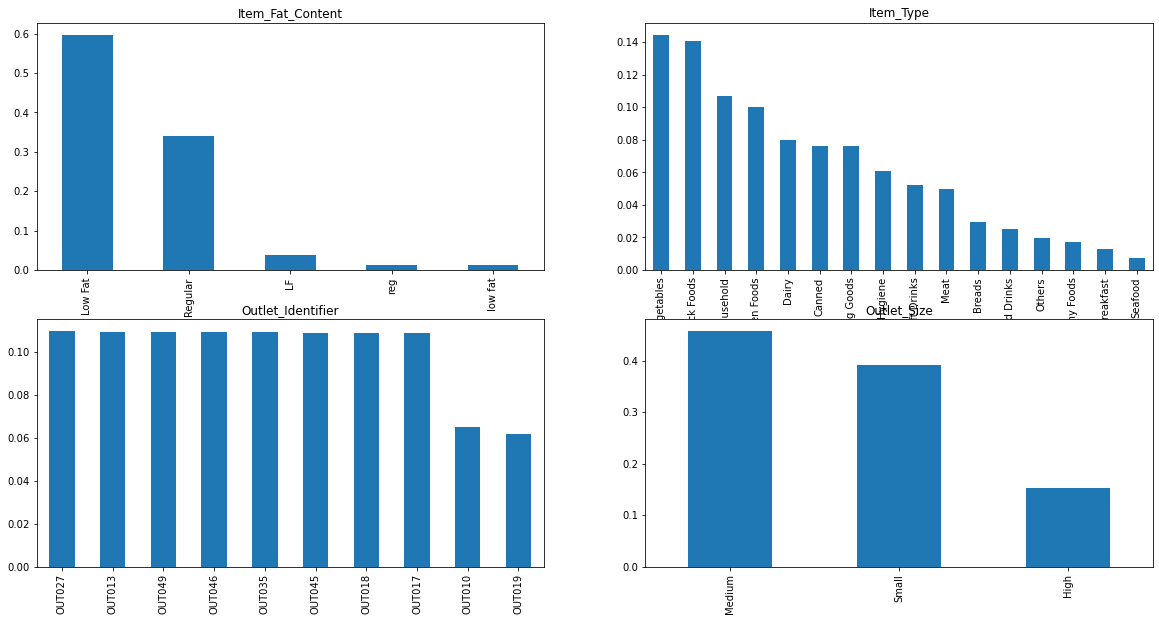

In [8]:
#Univariate analysis
plt.figure(1)
plt.subplot(221)
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Fat_Content")

plt.subplot(222)
train['Item_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Type")

plt.subplot(223)
train['Outlet_Identifier'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Identifier")

plt.subplot(224)
train['Outlet_Size'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Size")

# plt.subplot(225)
# train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Location_Type")

# plt.subplot(226)
# train['Outlet_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Type")

plt.show()


In [10]:
train['Item_Fat_Content'].replace('Low Fat', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('LF', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('low fat', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('reg', 'Regular',inplace=True)

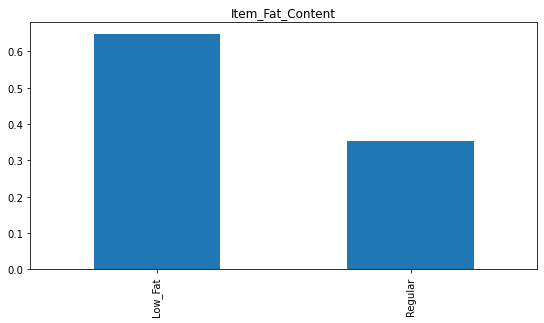

In [11]:
plt.figure(1)
plt.subplot(221)
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Fat_Content")
plt.show()

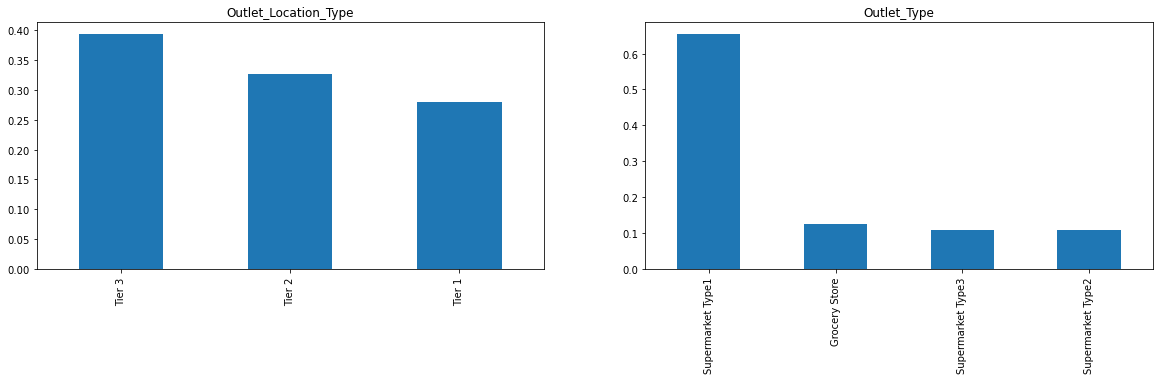

In [12]:
plt.figure(1)
plt.subplot(221)
train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Location_Type")

plt.subplot(222)
train['Outlet_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Type")

plt.show()

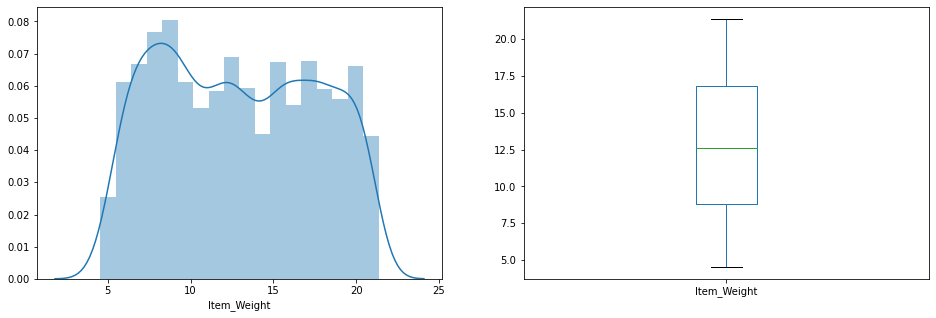

In [13]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Item_Weight'])

plt.subplot(122)
train['Item_Weight'].plot.box(figsize=(16,5))

plt.show()

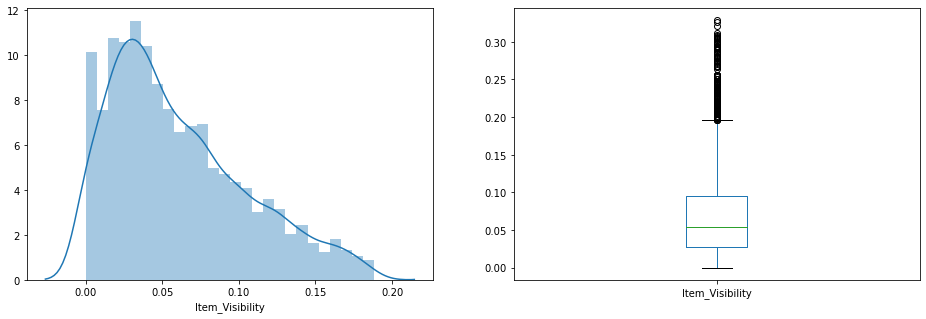

In [14]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Item_Visibility'])

plt.subplot(122)
train['Item_Visibility'].plot.box(figsize=(16,5))

plt.show()

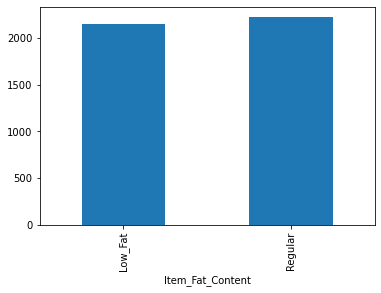

In [15]:
#Bivariate Analysis
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot.bar()

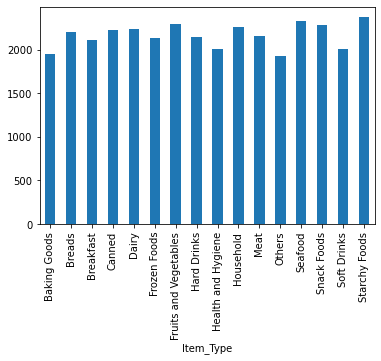

In [16]:
train.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar()

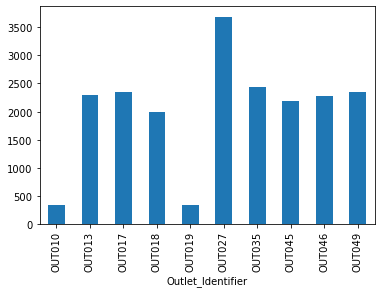

In [17]:
train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().plot.bar()

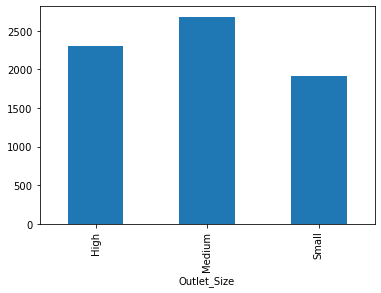

In [18]:
train.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar()

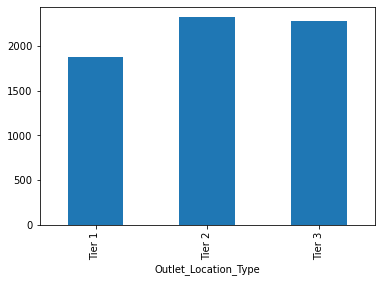

In [19]:
train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()

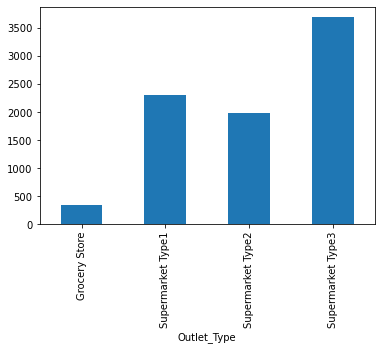

In [20]:
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()

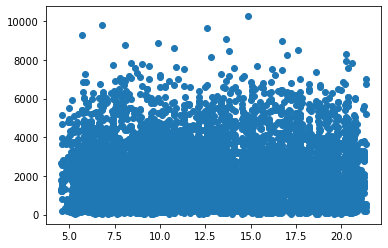

In [21]:

plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'])

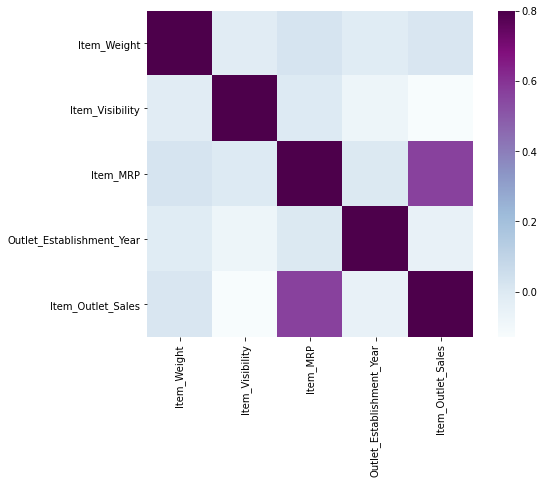

In [22]:

matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [23]:
#missing Values 
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
train['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [25]:
train['Item_Weight'].fillna(train['Item_Weight'].mode()[0], inplace=True)

In [26]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [27]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [28]:
#Check null values 
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

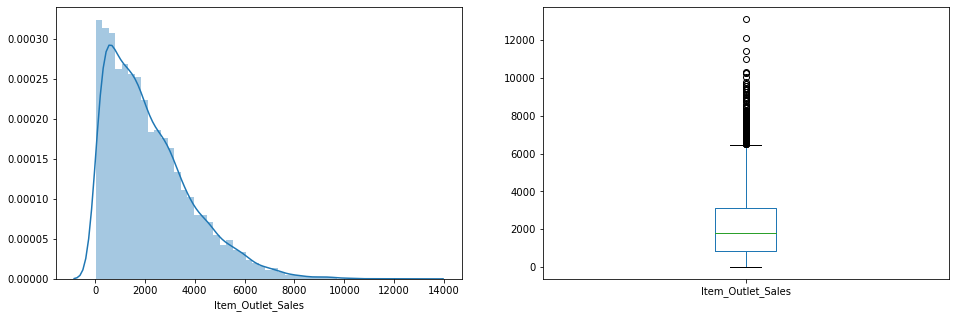

In [29]:
#outliers
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales'])

plt.subplot(122)
train['Item_Outlet_Sales'].plot.box(figsize=(16,5))

plt.show()

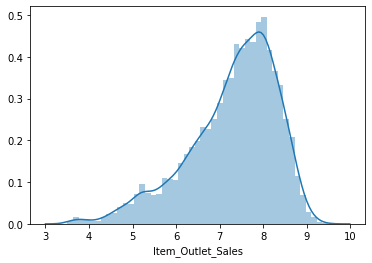

In [30]:
# As We can see the variable is not normally distributed so be normalize the varaible
train['Item_Outlet_Sales'] = np.log(train['Item_Outlet_Sales'])
sns.distplot(train['Item_Outlet_Sales'])

In [31]:
#Model Fitting
# Separting the Variable into Independent and Dependent 
X = train.iloc[:, 1:-1].values
y = train.iloc[:, -1].values

In [32]:
# Converting Categorical variables into dummy 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()

# Item_Fat_Content
X[:,1] = labelencoder_X.fit_transform(X[:,1])

# Item_Type
X[:,3] = labelencoder_X.fit_transform(X[:,3])

# Outlet_Identifier
X[:,5] = labelencoder_X.fit_transform(X[:,5])

# Outlet_Size
X[:,7] = labelencoder_X.fit_transform(X[:,7])

# Outlet_Location_Type
X[:,8] = labelencoder_X.fit_transform(X[:,8])

# Outlet_Location_Type
X[:,9] = labelencoder_X.fit_transform(X[:,9])

# Dummy Varaibles
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Fitting Multiple Linear regression on the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
# Fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

SVR()

In [37]:
# Fitting the Random Forest Model to the dataset
# Create your regressor her
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [38]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([7.77209669, 7.43889321, 7.63239209, ..., 8.38179644, 4.7817608 ,
       8.73569029])

In [39]:

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

accuracies.mean()
# accuracies.std()

0.6844207971408873